**Loading the dataset**

In [ ]:
!pip install -q kaggle
!mkdir /content/dataset
token = {"username":"krishna321gupta","key":"****************20403f5"}
import json
with open('kaggle.json', 'w') as file:
    json.dump(token, file)

mkdir: cannot create directory ‘/content/dataset’: File exists


In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v./content
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip /content/content/datasets/kmader/skin-cancer-mnist-ham10000/skin-cancer-mnist-ham10000.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: /content/dataset/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: 

In [ ]:
!ls dataset

ham10000_images_part_1	HAM10000_images_part_2	hmnist_28_28_RGB.csv
HAM10000_images_part_1	HAM10000_metadata.csv	hmnist_8_8_L.csv
ham10000_images_part_2	hmnist_28_28_L.csv	hmnist_8_8_RGB.csv


In [ ]:
from glob import glob
import os
path = '/content/dataset/'
images_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path,'*','*.jpg'))}
len(images_path)

10015

**Exploratory Data Analysis** (EDA)

In [ ]:
import pandas as pd
skin_df_main = pd.read_csv('/content/dataset/HAM10000_metadata.csv')
print("Overview of meata data")
print(skin_df_main.head())
print("Size of dataset")
print(skin_df_main.shape)
lesion_type_dict = {
    'nv' : 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec':'Actinic kerastoses',
    'vasc':'Vascular lesions',
    'df' : 'Dermatofibroma'
}
skin_df_main['cell_type'] = skin_df_main['dx'].map(lesion_type_dict.get)
print("Count of skin lessions present: \n", skin_df_main['cell_type'].value_counts())

Overview of meata data
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
Size of dataset
(10015, 7)
Count of skin lessions present: 
 Melanocytic nevi                 6705
Melanoma                         1113
Benign keratosis-like lesions    1099
Basal cell carcinoma              514
Actinic kerastoses                327
Vascular lesions                  142
Dermatofibroma                    115
Name: cell_type, dtype: int64


**Description** <br>
 1. Melanocytic Nevi:<br>
    Melanocytic nevi represent proliferations of melanocytes that are in contact with each other, forming small collections of cells known as nests. Melanocytic nevi commonly form during early childhood.


2. Melanoma <br>
Melanoma, also known as malignant melanoma, is a type of skin cancer that develops from the pigment-producing cells known as melanocytes. Melanomas typically occur in the skin but may rarely occur in the mouth, intestines or eye. 

3. Benign keratosis-like lesions: <br>
A seborrheic keratosis (seb-o-REE-ik ker-uh-TOE-sis) is a common noncancerous skin growth. People tend to get more of them as they get older. Seborrheic keratoses are usually brown, black or light tan. The growths look waxy, scaly and slightly raised.

4. Basal Cell Caricoma: <br>
Basal cell carcinoma is a type of skin cancer. Basal cell carcinoma begins in the basal cells — a type of cell within the skin that produces new skin cells as old ones die off. Basal cell carcinoma often appears as a slightly transparent bump on the skin, though it can take other forms.

5. Actinic kerastosis: <br>
An actinic keratosis (ak-TIN-ik ker-uh-TOE-sis) is a rough, scaly patch on your skin that develops from years of exposure to the sun. It's most commonly found on your face, lips, ears, back of your hands, forearms, scalp or neck.
6. Vascular lesions: <br>
Vascular lesions are relatively common abnormalities of the skin and underlying tissues, more commonly known as birthmarks. There are three major categories of vascular lesions: Hemangiomas, Vascular Malformations, and Pyogenic Granulomas.
7. Dermatofibroma : <br>
Dermatofibroma (superficial benign fibrous histiocytoma) is a common cutaneous nodule of unknown etiology that occurs more often in women. Dermatofibroma frequently develops on the extremities (mostly the lower legs) and is usually asymptomatic, although pruritus and tenderness can be present

In [ ]:
c_dict = {}
c_dict['nv']= 0
c_dict['mel']= 0
c_dict['bkl']= 0
c_dict['bcc']= 0
c_dict['akiec']= 0
c_dict['vasc']= 0
c_dict['df']= 0

skin_df = pd.DataFrame()
for i in range(10000):
  if c_dict[skin_df_main.loc[i]['dx']]<400:
    c_dict[skin_df_main.loc[i]['dx']] += 1
    skin_df = skin_df.append(skin_df_main.loc[i])
skin_df['path'] = skin_df['image_id'].map(images_path.get)
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [ ]:
c_dict

{'akiec': 313,
 'bcc': 400,
 'bkl': 400,
 'df': 115,
 'mel': 400,
 'nv': 400,
 'vasc': 142}

In [ ]:
import numpy as np
from PIL import Image
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((256,256))))

In [ ]:
skin_df.reset_index(inplace = True, drop = True)

In [ ]:
arr = []
for i in range(skin_df.shape[0]):
  if skin_df['cell_type_idx'][i] not in arr:
    print(skin_df['cell_type_idx'][i], skin_df['cell_type'][i])
    arr.append(skin_df['cell_type_idx'][i])

2 Benign keratosis-like lesions
4 Melanocytic nevi
3 Dermatofibroma
5 Melanoma
6 Vascular lesions
1 Basal cell carcinoma
0 Actinic kerastoses


In [ ]:
skin_df['localization'].value_counts()

lower extremity    464
back               428
face               328
upper extremity    260
trunk              197
abdomen            176
chest              115
scalp               57
neck                48
foot                27
hand                24
ear                 18
unknown             17
genital             11
Name: localization, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(skin_df, x ="localization", color = "cell_type")
fig.show()

In [ ]:
fig = px.histogram(skin_df, x ="age", color = "cell_type")
fig.show()

In [ ]:
fig = px.histogram(skin_df, x ="dx_type", color = "cell_type")
fig.show()

In [ ]:
fig = px.histogram(skin_df, x ="sex", color = "cell_type")
fig.show()

In [ ]:
X = skin_df['image']
X = X/255
y = skin_df['cell_type_idx']

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

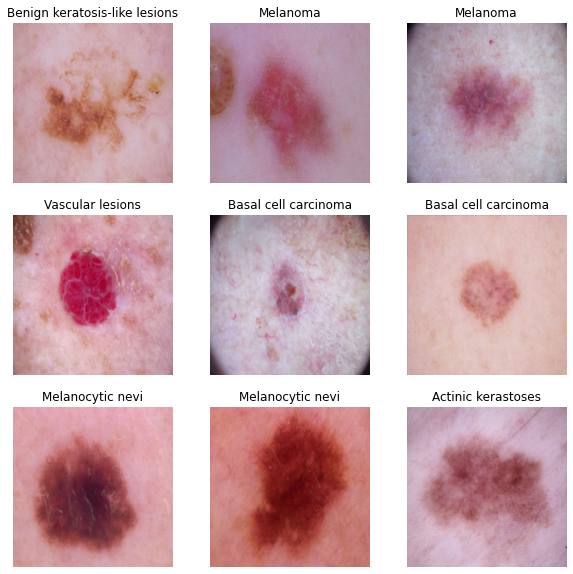

In [ ]:
class_names = skin_df['cell_type'].unique()

plt.figure(figsize=(10, 10))
for i in range(2,11):
  ax = plt.subplot(3, 3, i -1)
  plt.imshow(skin_df['image'][i*200])
  plt.title(skin_df['cell_type'][i*200])
  plt.axis("off")

In [ ]:
from sys import getsizeof
getsizeof(X)

3413410152

In [ ]:
getsizeof(lst)

18672

In [ ]:
lst = []
for _ in X:
    lst.append(_)
X = np.array(lst)
print(X.shape)

(2170, 256, 256, 3)


**Sampling Methods For Training:** 
1. Probability Sampling:
- Simple random sampling
- Cluster sampling
- Systematic sampling
- Stratified random sampling <br>
Uses: Reduce Sample Bias, Diverse Population, Create an Accurate Sample
2. Non-Probability Sampling:
- Convenience sampling
- Judgmental or purposive sampling

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 28)
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)
batch_size = 1
train_input_shape = (256,256,3)
n_classes = 7

**Neural Networks**

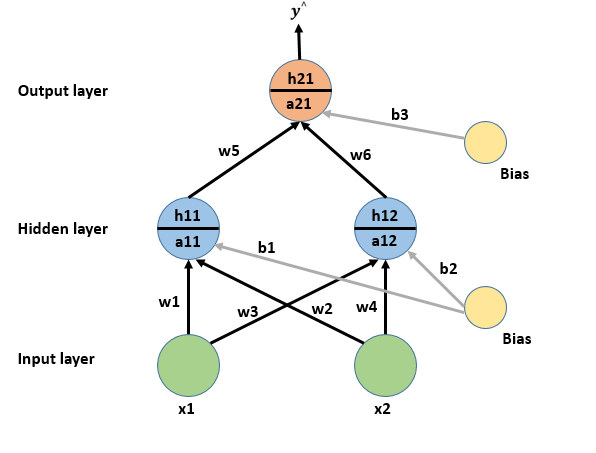

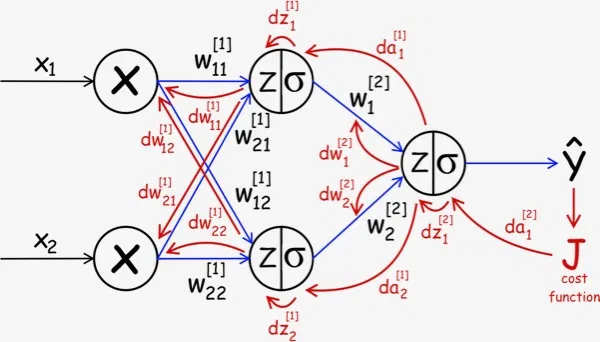

In [ ]:
from tensorflow.keras import layers
IMG_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


In [ ]:
from tensorflow.keras import datasets, models, optimizers, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input, Flatten
from tensorflow.keras.applications import MobileNetV2

**Convolutional Neural Networks**
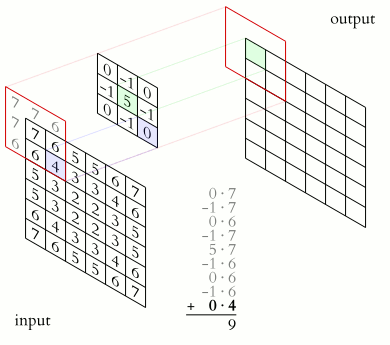

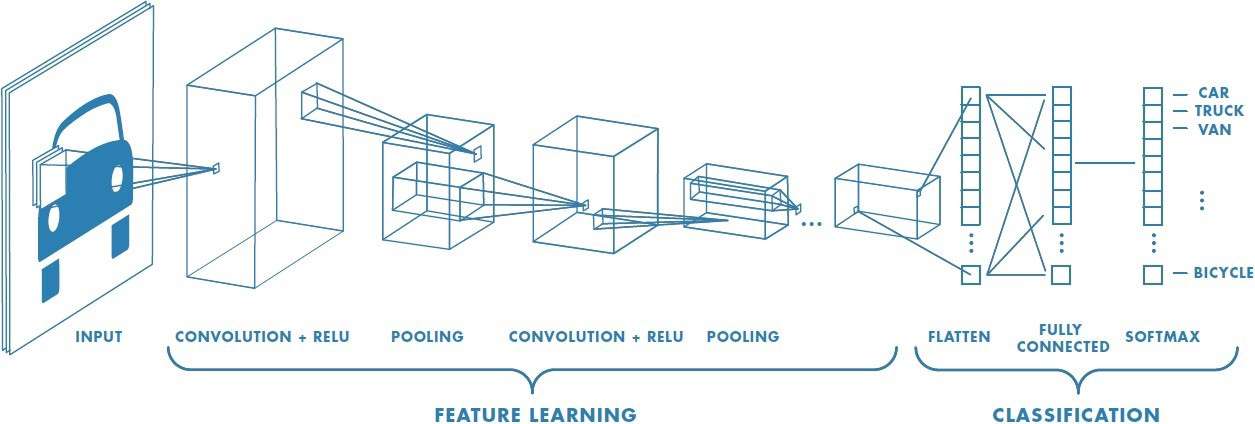

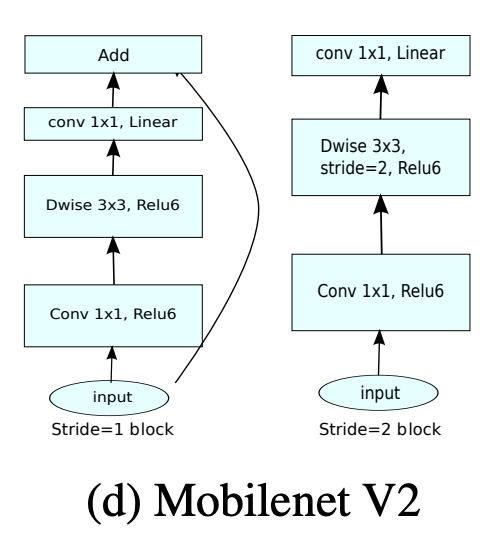

In [ ]:
base_model = MobileNetV2(include_top = False, input_shape = train_input_shape)
for layer in base_model.layers:
  layer.trainable = True

In [ ]:
def create_model():
  model = base_model.output
  model = Flatten()(model)

  model = Dense(512, kernel_initializer='he_uniform')(model)
  model = Dropout(0.2)(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)

  model = Dense(128, kernel_initializer='he_uniform')(model)
  model = Dropout(0.2)(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)

  model = Dense(52, kernel_initializer='he_uniform')(model)
  model = Dropout(0.2)(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)

  model = Dense(16, kernel_initializer='he_uniform')(model)
  model = Dropout(0.2)(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)

  output = Dense(n_classes, activation='softmax')(model)

  model = Model(inputs=base_model.input, outputs=output)
  return model 

In [ ]:
model = create_model()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 257, 257, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

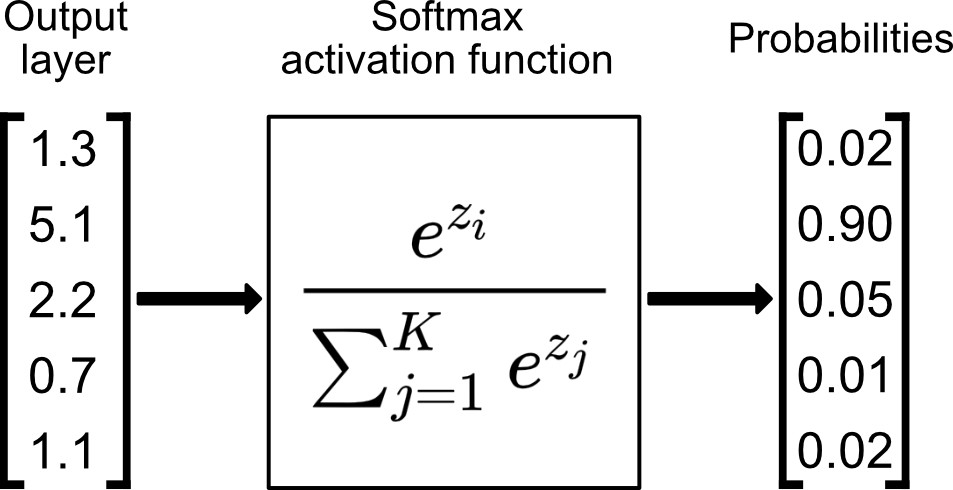

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
optimizer = Adam(lr = 0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
n_epoch = 10

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [ ]:
history = model.fit(x_train,y_train,epochs=60,
                              callbacks=[reduce_lr,early_stop],validation_data=(x_test,y_test))

Epoch 1/60
55/55 [==============================] - 17s 302ms/step - loss: 1.8833 - accuracy: 0.2753 - val_loss: 2.2497 - val_accuracy: 0.2327
Epoch 2/60
55/55 [==============================] - 15s 274ms/step - loss: 1.5734 - accuracy: 0.4205 - val_loss: 2.0823 - val_accuracy: 0.2120
Epoch 3/60
55/55 [==============================] - 15s 268ms/step - loss: 1.4027 - accuracy: 0.5132 - val_loss: 2.1892 - val_accuracy: 0.2189
Epoch 4/60
55/55 [==============================] - 15s 275ms/step - loss: 1.2922 - accuracy: 0.5887 - val_loss: 1.9265 - val_accuracy: 0.2834
Epoch 5/60
55/55 [==============================] - 15s 273ms/step - loss: 1.2013 - accuracy: 0.6377 - val_loss: 1.8649 - val_accuracy: 0.2880
Epoch 6/60
55/55 [==============================] - 15s 275ms/step - loss: 1.1242 - accuracy: 0.6941 - val_loss: 1.8379 - val_accuracy: 0.2972
Epoch 7/60
55/55 [==============================] - 15s 281ms/step - loss: 1.0474 - accuracy: 0.7414 - val_loss: 1.8124 - val_accuracy: 0.3180

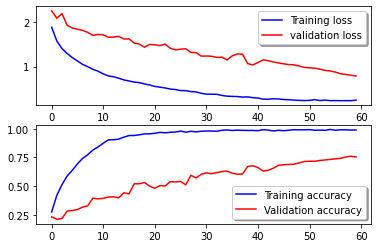

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color = 'b', label='Training loss')
ax[0].plot(history.history['val_loss'], color = 'r', label = 'validation loss', axes = ax[0])
legend = ax[0].legend(loc='best', shadow = True)

ax[1].plot(history.history['accuracy'], color='b', label = 'Training accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label = 'Validation accuracy')
legend = ax[1].legend(loc='best', shadow = True)

In [ ]:
cancer_model = model.to_json()
with open("cancer_model.json","w") as json_file:
  json_file.write(cancer_model)
model.save_weights("cancer_model.h5")